In [1]:
import os
import sys
import numpy as np
import pandas as pd
import math as mt
sys.path.insert(0, os.path.abspath('..'))

from autocnet.examples import get_path
from autocnet.graph.network import CandidateGraph
from autocnet.graph.edge import Edge
from autocnet.matcher.matcher import FlannMatcher

from IPython.display import display

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [12]:
adjacency = get_path('two_image_adjacency.json')
basepath = get_path('Apollo15')
cg = CandidateGraph.from_adjacency(adjacency, basepath=basepath)

#Apply SIFT to extract features
cg.extract_features(method='sift', extractor_parameters={'nfeatures':500})

#Match
cg.match_features()

#Apply outlier detection
cg.apply_func_to_edges(Edge.symmetry_check)
cg.apply_func_to_edges(Edge.ratio_check)
m = cg.edge[0][1].masks
cg.minimum_spanning_tree()

#Compute a homography and apply RANSAC
cg.compute_fundamental_matrices(clean_keys = ['ratio', 'symmetry'])

In [13]:
cg.edge[0][1]._masks
cg.node[0]


        NodeID: 0
        Image Name: AS15-M-0298_SML.png
        Image PATH: /home/acpaquette/autocnet/autocnet/examples/Apollo15/AS15-M-0298_SML.png
        Number Keypoints: 500
        Available Masks : Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[500 rows x 0 columns]
        Type: <class 'autocnet.graph.node.Node'>
        

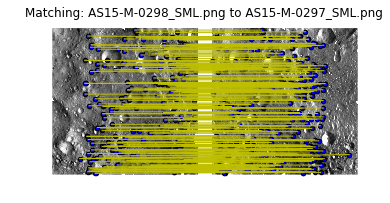

In [4]:
cg.edge[0][1].plot(clean_keys = ['fundamental'])

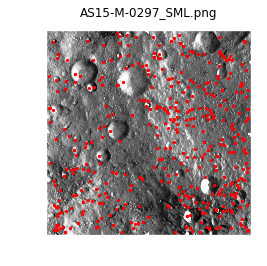

In [5]:
cg.node[1].plot()

In [ ]:
df[minimum.mask].plot(kind = 'scatter', x = 'x', y = 'y')
print(len(df[minimum.mask]))

if len(df[minimum.mask]) not in range (1, 2):
    raise ValueError('Number of points not in range')

In [ ]:
r = np.random.RandomState(12345)
df = pd.DataFrame(r.uniform(0,100,(500, 3)), columns=['x', 'y', 'strength'])
minimum = SpatialSuppression(df, (100,100), k = 15)

print(minimum.domain)
minimum.suppress()
df.plot(kind = 'scatter', x = 'x', y = 'y')

In [ ]:
df[minimum.mask].plot(kind = 'scatter', x = 'x', y = 'y')
print(len(df[minimum.mask]))

assertIsInstance(df[minimum.mask], (3, 5))